# **QPSK BER Kurve mit Commpy und SNR**

mit Commpy Package für QPSK

mit beschränkter Y-Achse

-> falls noch nicht erfolgt, immer erst Commpy-Package installieren

In [ ]:
#Commpy Package muss je nach Umgebung erst installiert werden
pip install scikit-commpy

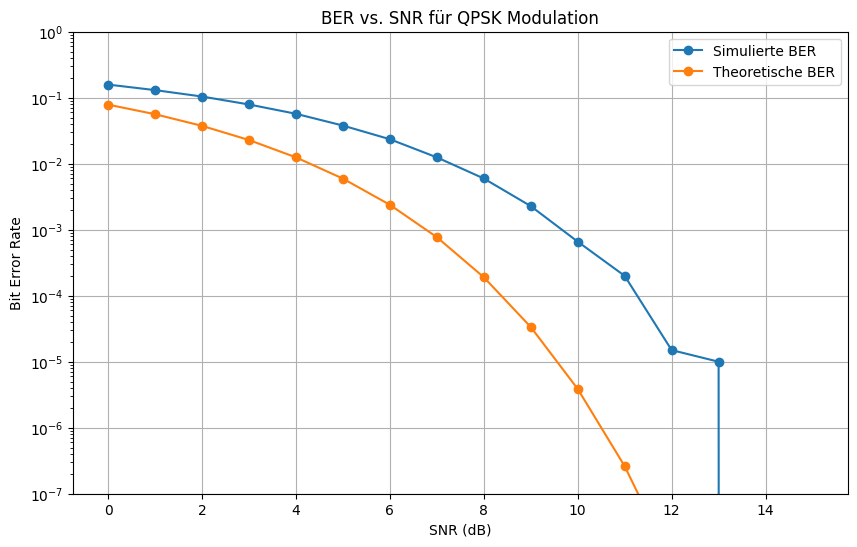

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from commpy.channels import awgn
from commpy.modulation import PSKModem
# Commpy.Modulation -> https://commpy.readthedocs.io/en/latest/modulation.html
# https://github.com/veeresht/CommPy/blob/master/commpy/modulation.py
# demod_type -> 'hard' für Bits

def theo_ber_qpsk(snr_db):
    # Berechnet die theoretische BER für QPSK im AWGN-Kanal
    # Umrechnung des SNR_dB Werts in eine lineare Skala
    snr_lin = 10 ** (snr_db / 10)
    return 0.5 * erfc(np.sqrt(snr_lin))

# Modem für QPSK erstellen
modem = PSKModem(4)  # 4 steht für QPSK -> kann nicht einfach auf 16 für QAM erhöht werden

# Definiere den SNR-Bereich in dB
snr_dB = np.arange(0, 16, 1)  # SNR von 0 bis 20 dB in Schritten von 1 dB
ber_simu = []
ber_theo = []

# Simulation und theoretische Berechnung durchführen
for snr in snr_dB:
    np.random.seed(42)
    bits = np.random.randint(0, 2, 200000)  # 2000 zufällige Bits
    bits_mod = modem.modulate(bits)
    noise = awgn(bits_mod, snr)
    demod = modem.demodulate(noise, demod_type='hard') # siehe oben
    ber_simu.append(np.mean(bits != demod))
    ber_theo.append(theo_ber_qpsk(snr))

# BER-Kurven plotten
plt.figure(figsize=(10, 6))
plt.semilogy(snr_dB, ber_simu, 'o-', label='Simulierte BER')
plt.semilogy(snr_dB, ber_theo, 'o-', label='Theoretische BER')
plt.title('BER vs. SNR für QPSK Modulation')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate')
plt.ylim([1e-7, 1])  # Y-Achsen-Begrenzung
plt.legend()
plt.grid(True)
plt.show()


### Anmerkungen:
* der plötzliche Knick in der simulierten BER -> ?
  * bei deutlich mehr Bits teilweise nicht vorhanden -> 10.000.000 Bits
* die theoretische Kurve würde bei nicht Begrenzung bis ca. $10^{80}$ reichen
* QPSK macht, ob mit Mapping oder Commpy Package, einen bessere Schnitt als QAM-16 bzw. erreicht schon bei geringeren SNR-Werten eine geringere Fehlerrate